In [10]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('diagonalizaton_results.csv')

In [12]:
df.drop(df[df.Iteration==0].index, inplace=True)

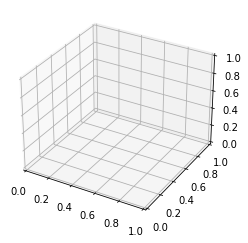

In [13]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(2,3,4) # plot the point (2,3,4) on the figure
# plt.show()

In [14]:
df.head()

,Unnamed: 0,offer_01,offer_02,offer_03,bids_01,bids_02,bids_03,Time,Iteration
24,0,0.0,0.0,0.0,0.486502,0.609184,0.502634,16,1
25,1,0.0,0.0,0.0,1.071353,0.498120,0.936928,17,1
26,2,0.0,0.0,0.0,2.138046,1.114838,1.532769,18,1
27,3,0.0,0.0,0.0,0.315340,0.837340,0.765340,19,1
28,4,0.0,0.0,0.0,0.422000,3.121210,1.838600,20,1


<AxesSubplot:>

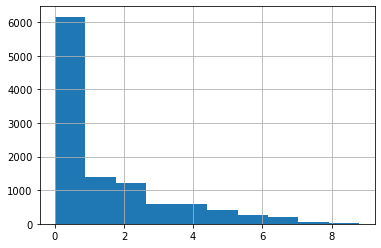

In [15]:
df["bids_01"].hist()

In [16]:
x = df['bids_01']
y=  df.Iteration
z=  df.Time

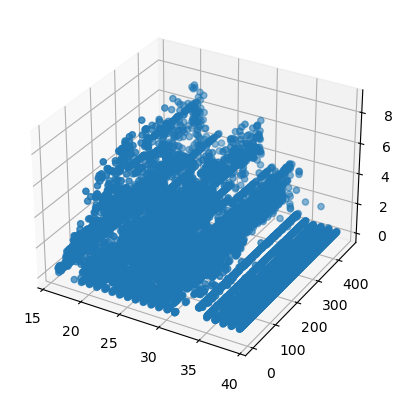

In [17]:
plt.rcParams.update(plt.rcParamsDefault)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(z, y, x, marker='o')

plt.show()

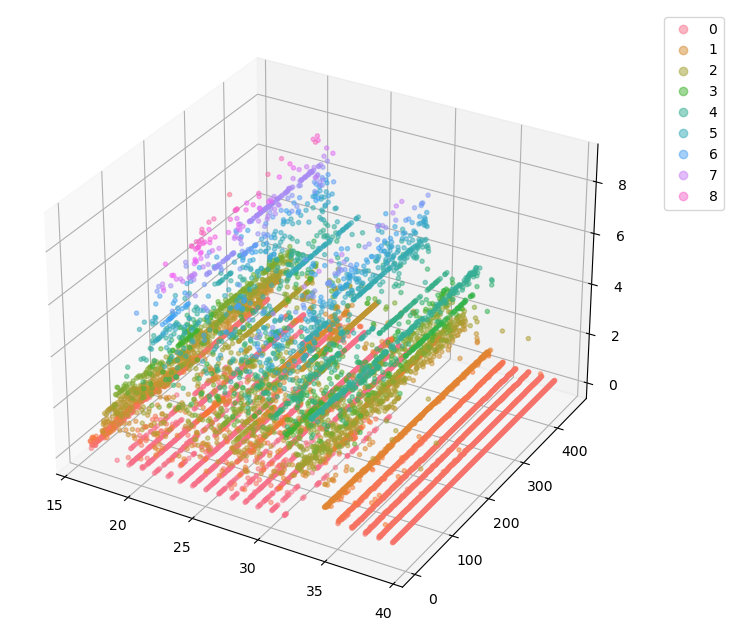

In [18]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(z, y, x, s=max(x), c=x, marker='o', cmap=cmap, alpha=0.5)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()


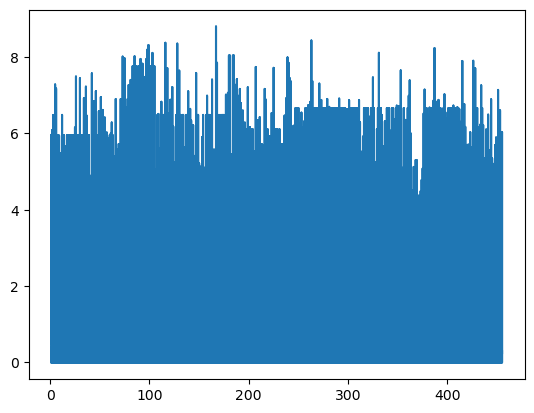

In [19]:
fig = plt.figure()

ax = fig.add_subplot(111)


ax.plot(y, x)

plt.show()


In [20]:
x=df.bids_01[df.Time==16]
z=df.Iteration[df.Time==16]

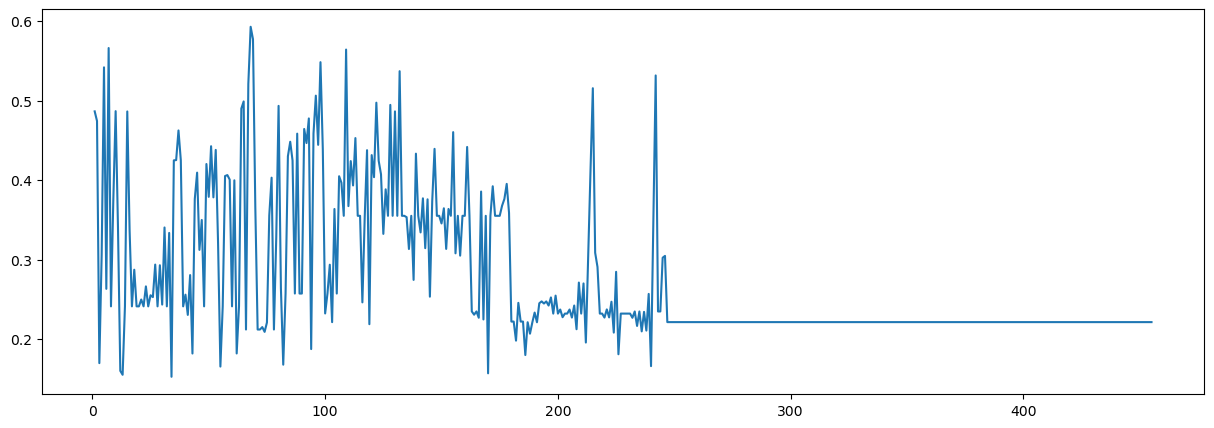

In [21]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(z, x)
plt.show()

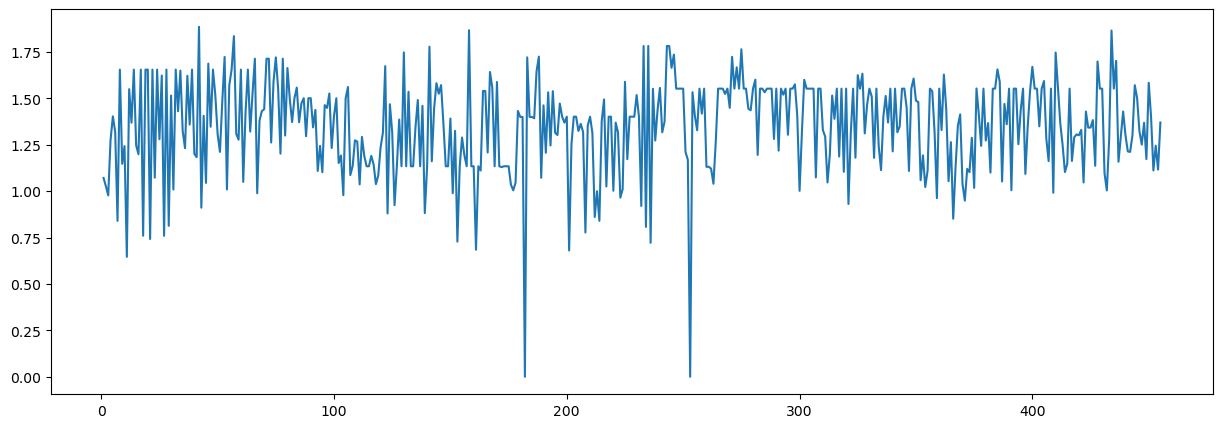

In [22]:
x=df.bids_01[df.Time==17]
z=df.Iteration[df.Time==17]
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(z, x)
plt.show()

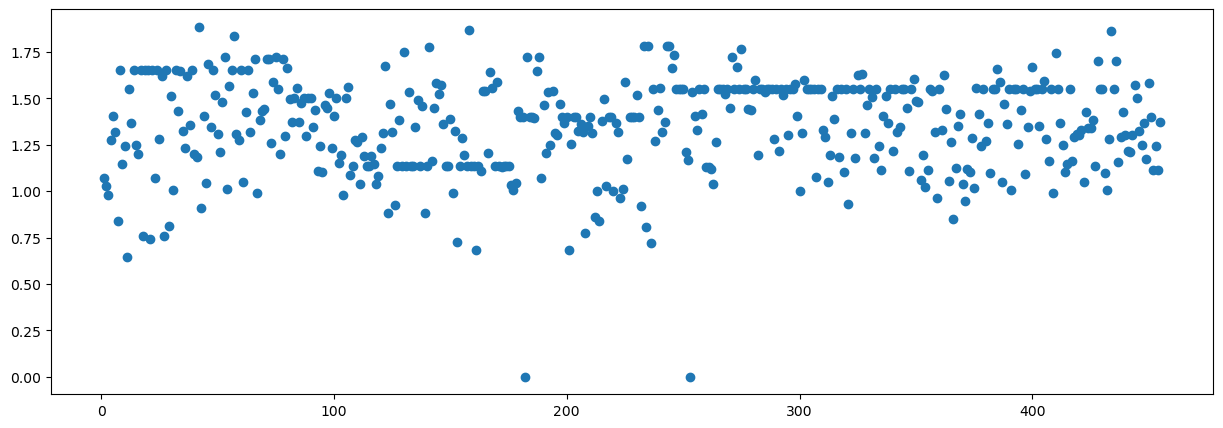

In [24]:
x=df.bids_01[df.Time==17]
y=df.Time[df.Time==17]
z=df.Iteration[df.Time==17]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(z,x)
plt.show()

# Seaborn 01

In [25]:
import seaborn as sns
#sns.set()

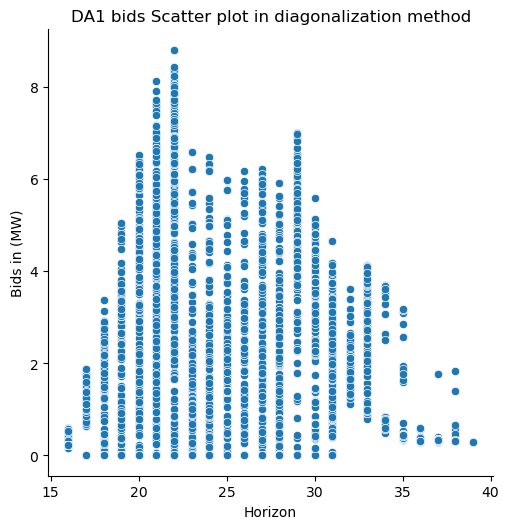

In [26]:
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
# plt.figure(figsize=(20,5));
ax= sns.relplot(data=df, x='Time', y='bids_01');
ax.set(xlabel='Horizon', title='DA1 bids Scatter plot in diagonalization method', ylabel='Bids in (MW)');
ax.savefig('DA1_bids_scatter_plot.png', dpi=100)
# fig1 = plt.gcf()
# plt.show()
# plt.draw()
# # fig1.savefig('DA1_bids_scatter_plot.png', dpi=100, tight=True)

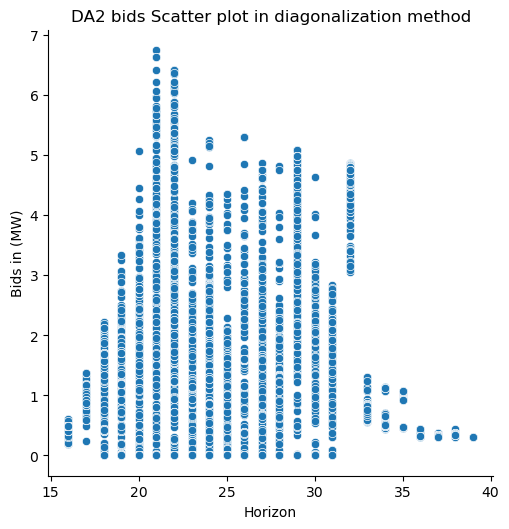

In [27]:
ax= sns.relplot(data=df, x='Time', y='bids_02');
ax.set(xlabel='Horizon', title='DA2 bids Scatter plot in diagonalization method', ylabel='Bids in (MW)');
ax.savefig('DA2_bids_scatter_plot.png', dpi=100)

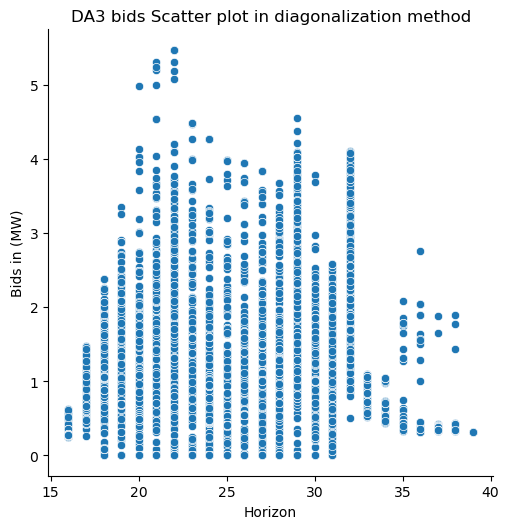

In [28]:
ax= sns.relplot(data=df, x='Time', y='bids_03');
ax.set(xlabel='Horizon', title='DA3 bids Scatter plot in diagonalization method', ylabel='Bids in (MW)');
ax.savefig('DA3_bids_scatter_plot.png', dpi=100)

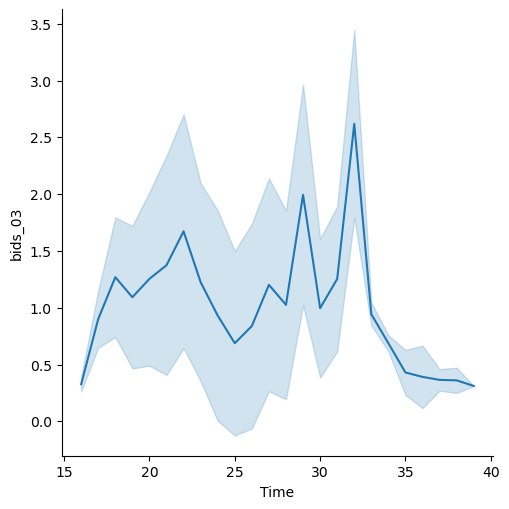

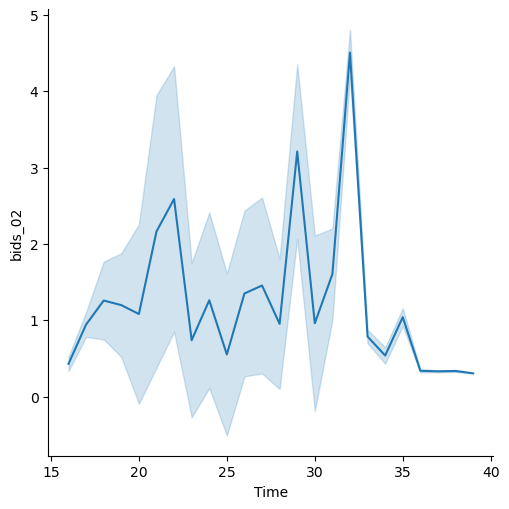

In [29]:
ax= sns.relplot(data=df, x='Time', y='bids_03', kind='line', ci='sd');
ax= sns.relplot(data=df, x='Time', y='bids_02', kind='line', ci='sd');

## pivoting

In [30]:
df

,Unnamed: 0,offer_01,offer_02,offer_03,bids_01,bids_02,bids_03,Time,Iteration
24,0,0.0,0.0,0.0,0.486502,0.609184,0.502634,16,1
25,1,0.0,0.0,0.0,1.071353,0.498120,0.936928,17,1
26,2,0.0,0.0,0.0,2.138046,1.114838,1.532769,18,1
27,3,0.0,0.0,0.0,0.315340,0.837340,0.765340,19,1
28,4,0.0,0.0,0.0,0.422000,3.121210,1.838600,20,1
...,...,...,...,...,...,...,...,...,...
10939,19,0.0,0.0,0.0,0.433350,1.076332,0.397709,35,455
10940,20,0.0,0.0,0.0,0.312747,0.329091,0.358772,36,455
10941,21,0.0,0.0,0.0,0.335364,0.314700,0.338641,37,455
10942,22,0.0,0.0,0.0,0.303898,0.332373,0.338143,38,455


In [31]:
df2 = df[["bids_01","bids_02","bids_03","Time"]].copy()

In [32]:
df2

,bids_01,bids_02,bids_03,Time
24,0.486502,0.609184,0.502634,16
25,1.071353,0.498120,0.936928,17
26,2.138046,1.114838,1.532769,18
27,0.315340,0.837340,0.765340,19
28,0.422000,3.121210,1.838600,20
...,...,...,...,...
10939,0.433350,1.076332,0.397709,35
10940,0.312747,0.329091,0.358772,36
10941,0.335364,0.314700,0.338641,37
10942,0.303898,0.332373,0.338143,38


In [33]:
df2.pivot(values=["bids_01","bids_02","bids_03"], columns="Time")

bids_01                                                          ...  \
Time         16        17        18       19     20  21  22  23  24  25  ...   
24     0.486502       NaN       NaN      NaN    NaN NaN NaN NaN NaN NaN  ...   
25          NaN  1.071353       NaN      NaN    NaN NaN NaN NaN NaN NaN  ...   
26          NaN       NaN  2.138046      NaN    NaN NaN NaN NaN NaN NaN  ...   
27          NaN       NaN       NaN  0.31534    NaN NaN NaN NaN NaN NaN  ...   
28          NaN       NaN       NaN      NaN  0.422 NaN NaN NaN NaN NaN  ...   
...         ...       ...       ...      ...    ...  ..  ..  ..  ..  ..  ...   
10939       NaN       NaN       NaN      NaN    NaN NaN NaN NaN NaN NaN  ...   
10940       NaN       NaN       NaN      NaN    NaN NaN NaN NaN NaN NaN  ...   
10941       NaN       NaN       NaN      NaN    NaN NaN NaN NaN NaN NaN  ...   
10942       NaN       NaN       NaN      NaN    NaN NaN NaN NaN NaN NaN  ...   
10943       NaN       NaN       NaN      NaN    NaN NaN NaN NaN NaN NaN  ...   

      bids_03                                                          \
Time       30  31  32  33  34        35        36        37        38   
24        NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
25        NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
26        NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
27        NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
28        NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   
...       ...  ..  ..  ..  ..       ...       ...       ...       ...   
10939     NaN NaN NaN NaN NaN  0.397709       NaN       NaN       NaN   
10940     NaN NaN NaN NaN NaN       NaN  0.358772       NaN       NaN   
10941     NaN NaN NaN NaN NaN       NaN       NaN  0.338641       NaN   
10942     NaN NaN NaN NaN NaN       NaN       NaN       NaN  0.338143   
10943     NaN NaN NaN NaN NaN       NaN       NaN       NaN       NaN   

                 
Time         39  
24          NaN  
25          NaN  
26          NaN  
27          NaN  
28          NaN  
...         ...  
10939       NaN  
10940       NaN  
10941       NaN  
10942       NaN  
10943  0.311317  

[10920 rows x 72 columns]

In [34]:
df2 = pd.melt(df2, id_vars=["Time"], var_name="Bidder", value_name='obj_value')

In [35]:
df2

,Time,Bidder,obj_value
0,16,bids_01,0.486502
1,17,bids_01,1.071353
2,18,bids_01,2.138046
3,19,bids_01,0.315340
4,20,bids_01,0.422000
...,...,...,...
32755,35,bids_03,0.397709
32756,36,bids_03,0.358772
32757,37,bids_03,0.338641
32758,38,bids_03,0.338143


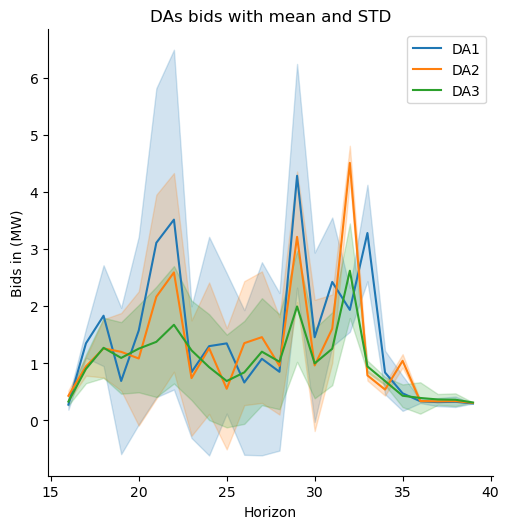

In [36]:
ax= sns.relplot(data=df2, x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', legend=False);
ax.set(xlabel='Horizon', title='DAs bids with mean and STD', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA1', 'DA2', 'DA3'])
ax.savefig('DAs_bids_STD_plot.png', dpi=100)

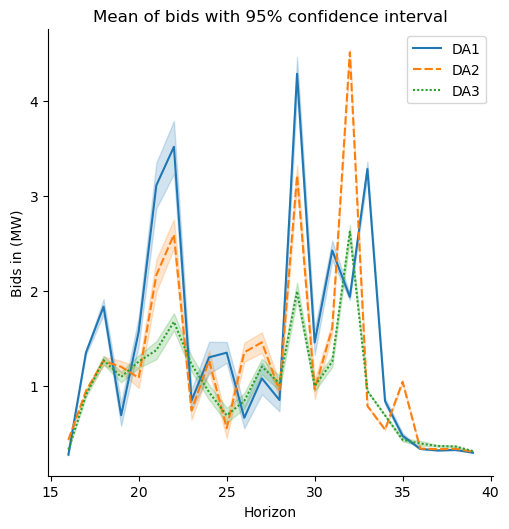

In [37]:
ax= sns.relplot(data=df2, x='Time', y='obj_value', kind='line', hue='Bidder', style='Bidder', legend=False);
ax.set(xlabel='Horizon', title='Mean of bids with 95% confidence interval', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA1', 'DA2', 'DA3'])
ax.savefig('DAs_bids_MEAN_plot.png', dpi=100)

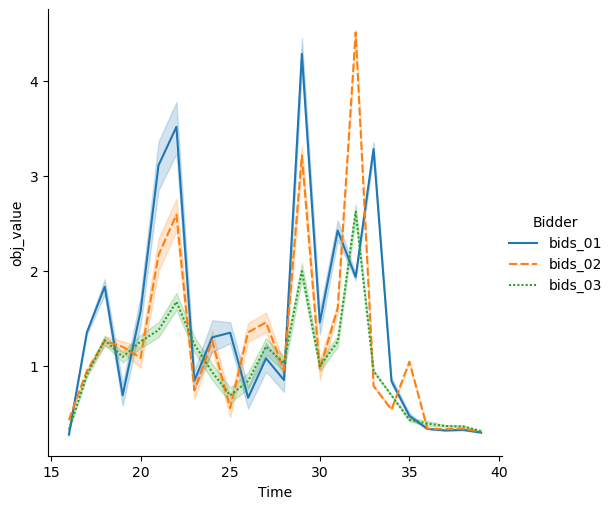

In [38]:
ax= sns.relplot(data=df2, x='Time', y='obj_value',kind='line', hue='Bidder', style='Bidder');


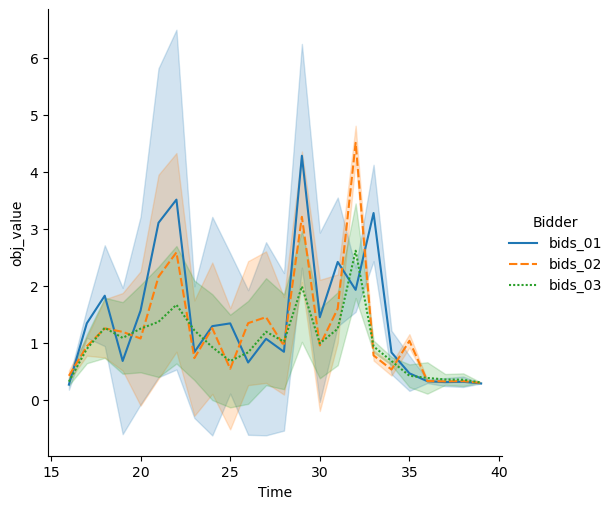

In [39]:
ax= sns.relplot(data=df2, x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', style='Bidder');

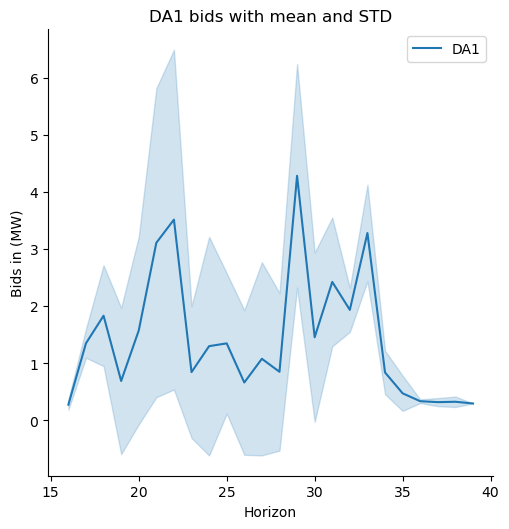

In [40]:
ax= sns.relplot(data=df2[df2.Bidder=='bids_01'], x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', style='Bidder',legend=False);
ax.set(xlabel='Horizon', title='DA1 bids with mean and STD', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA1'])
ax.savefig('DA1_bids_STD_plot.png', dpi=100)

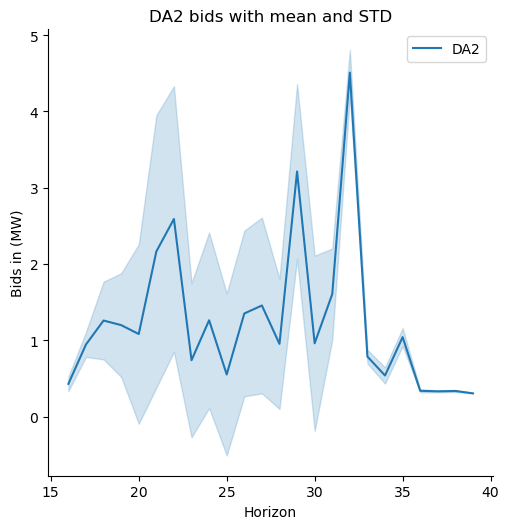

In [41]:
ax= sns.relplot(data=df2[df2.Bidder=='bids_02'], x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', style='Bidder',legend=False);
ax.set(xlabel='Horizon', title='DA2 bids with mean and STD', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA2'])
ax.savefig('DA2_bids_STD_plot.png', dpi=100)

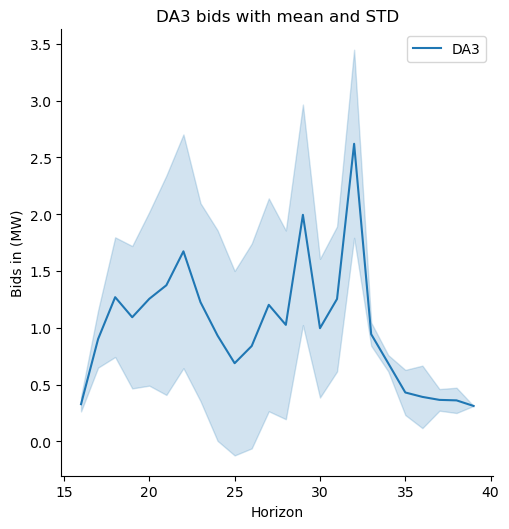

In [42]:
ax= sns.relplot(data=df2[df2.Bidder=='bids_03'], x='Time', y='obj_value', kind='line', ci='sd', hue='Bidder', style='Bidder', legend=False);
ax.set(xlabel='Horizon', title='DA3 bids with mean and STD', ylabel='Bids in (MW)');
plt.legend(loc='upper right', labels=['DA3'])
ax.savefig('DA3_bids_STD_plot.png', dpi=100)